# Sentiment Analysis of Yelp Hotel Reviews
      
Mary Kryslette C. Bunyi   
PPOL566 (Data Science III) Extra Credit Project

# Background
**Research Question:** How well do unlabeled sentiment analysis models approximate the actual star ratings that reviewers give? Can we do away with the star rating requirement and still gain accurate insight into customers' sentiment? What are the tradeoffs, if any? 

**Objective:** Compare the unlabeled approaches -- lexical-based (TextBlob), transfer learning/DL (transformers) -- to the ground truth labels/ratings supplied by the customers and determine how well the alternative approaches perform

# Methods
Exploratory data analysis shows that the dataset is largely imbalanced and skewed towards higher ratings (i.e., 4 and 5). Mapping the 1-5 Yelp rating scale to positive (4-5) and negative (1-3) sentiment still shows an imbalance. However, this can be remedied by taking equal-sized samples for our sentiment analysis models.
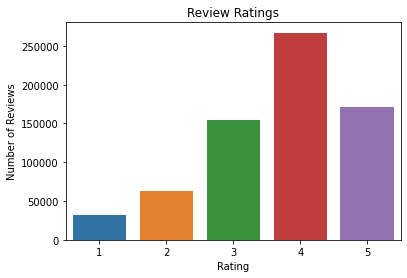

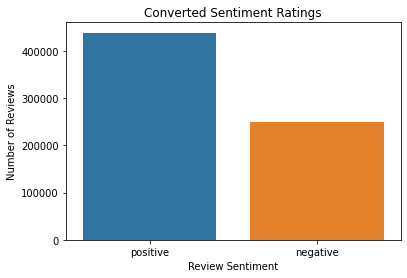

To speed up computation, I took a sample of 500 observations each from the set of positive and negative reviews. I also cleaned the text by expanding contractions (which may be important since they may denote negation) and removing non-letters.

I ran the lexicon-based (TextBlob) and transfer learning (BERT sentiment analysis) models to both the raw and cleaned data to check for the robustness of their performances. Since TextBlob outputs a polarity score instead of binary labels, I determined the cut-off scores based on the value where the distributions of the true positive and negative sentiments meet. Above this cut-off, reviews are labeled positive. Below this cut-off, reviews are identified as negative.

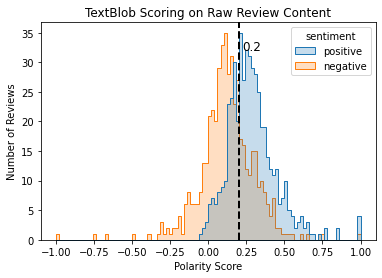

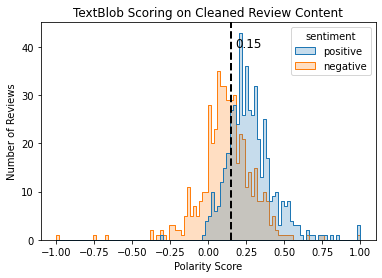

For the transfer learning approach, I used the default BERT sentiment analysis model. However, its implementation cannot handle text with more than 512 tokens. Thus, I set "truncation" to True, which means that for very long reviews, the classifier considers only the first 512 tokens. I do not expect this to have a significant effect on the results.

# Findings

Both the TextBlob and the BERT models registered above-70% accuracy, precision, recall, and F1 scores for both raw and cleaned data. These are good results considering that we are using unsupervised learning approaches. We could expect performance to further improve when the models train on the actual Yelp dataset.

A key objective of sentiment analysis on customer reviews is the improvement of products and services. While the transfer learning model edges the lexicon-based model across all 4 evaluation metrics chosen, if we would like to capture as much of the negative reviews as possible, applying TextBlob on Raw Data may be the best choice as it yields the highest number of true negatives (i.e., correctly tagged negative reviews) and the smallest number of false positives (i.e., negative reviews that the model mistook as positive). However, the trade-off for this model would be the presence of higher false negatives.

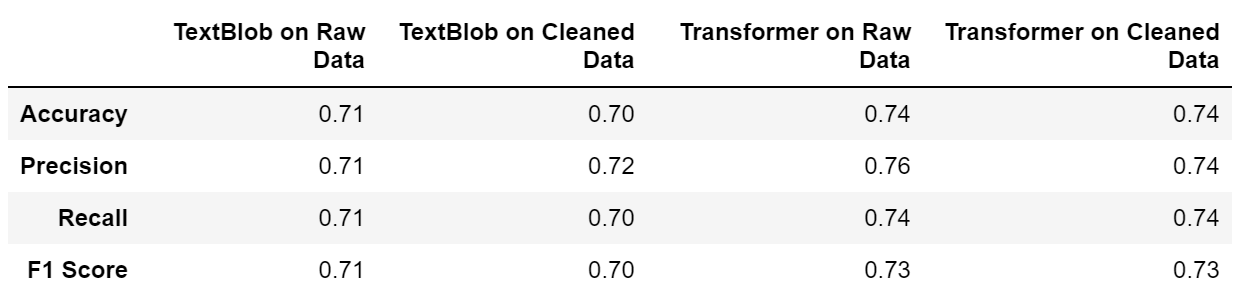

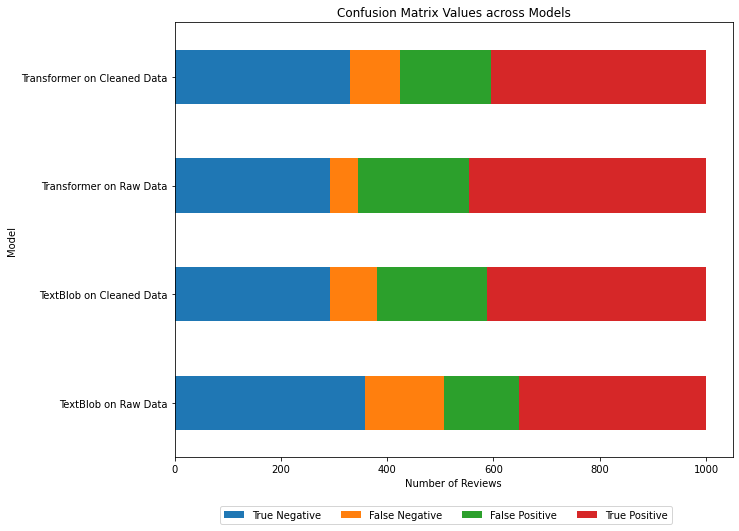

Word clouds of misclassified reviews (excluding the usual stopwords) show that there is considerable similarity between misclassified positive and negative reviews. For instance, misclassifications of the TextBlob model on raw data similarly mentioned words like good, place, like, great, and food. Aside from contributing to a whole thought/idea, many of these words express sentiment. It may be challenging to consider these as stopwords. Doing so may disrupt the meaning and sentiment of text. (The appendix contains word clouds for the other models, which generated similar results.)

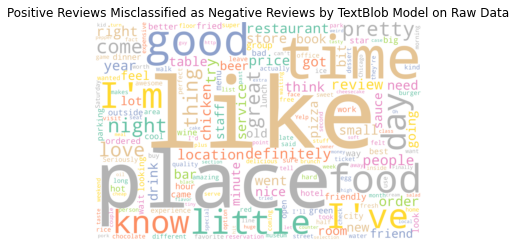

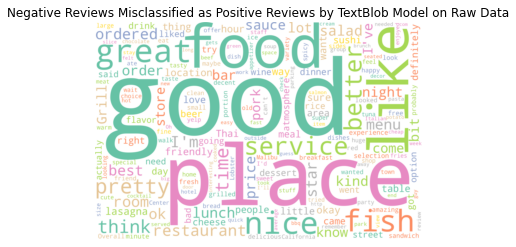

# Conclusions
Sentiment analysis models can provide a good approximation of customer sentiment. Both the lexicon-based (TextBlob) and transfer learning-based (BERT) sentiment analysis models performed well in predicting reviewers' actual ratings. Both registered above-70% scores across all evaluation metrics (i.e., accuracy, precision, recall, and F1 scores). 

While transfer learning is superior to the lexicon-based approach across all evaluation metrics, if our key objective is to identify areas for improvement, then it may be worthwhile to consider the model that captures the widest range of negative reviews possible. This is the TextBlob model as applied to raw review content. This model generates the most true negatives and the fewest false positives. However, given its propensity to identify reviews as negative, the trade-off for using this model would be the presence of higher false negatives.

Performance would only improve once the models train on the actual Yelp dataset. Nonetheless, these models are only able to distinguish between positive and negative sentiments, whereas the star ratings are more granular and add a dimension of intensity to customer sentiment. The difference in intensity may be valuable especially as extremely negative or positive ratings will tend to sway prospective customers. At the same time, "1" rating reviews may highlight the most pressing areas of concern while "5" rating reviews may surface comparative advantages that the hotels can best capitalize. In this regard, the 1-5 star rating scale can still be valuable.

# Recommendations
Given our large corpus of Yelp reviews which contains labeled data, we could easily train our model on the existing dataset. We could also upgrade the current models to perform multi-class predictions. For instance, TextBlob polarity scores could be mapped to discrete ratings. Instead of the default transformer model for sentiment analysis, we could also try using more focused pretrained models such as "nlptown/bert-base-multilingual-uncased-sentiment", which was finetuned specifically on product reviews and is able to predict 1 to 5 ratings.

We could likewise explore using our models in conjunction with other transformer models such as text summarization and named entity recognition. First, text summarization can help in extracting key information especially from longer reviews which are beyond the parsing capacity of the transfer learning (BERT) sentiment analysis model. Text summarization may also help in removing noise and keeping only the salient points of a review, thereby increasing label accuracy. Second, named entity recognition can help in reducing noise by dropping proper nouns, which do not express any sentiment.

As mentioned, while the sentiment analysis models performed well in predicting the reviewers' overall sentiment, the 1-5 star rating scale can still be valuable as they add a layer of intensity to the sentiment. To keep the it from becoming a deterrent, the discrete rating could be turned optional.

Similarly, it is possible that the sentiments of a significant proportion of customers remain unrecorded because they do not want to type text reviews. In this case, to capture more accurate ratings for the hotels, the text review could become optional as well.

Customers may also be given the option to provide more granular discrete ratings across different aspects of the experience. These ratings could be compared against text reviews of customers who choose not to select discrete ratings. More granular ratings may likewise show specific areas (e.g., service, food) where the companies can focus, which the text ratings may then provide further detail into.

# Annex: Code

In [1]:
# Setup
import warnings
warnings.filterwarnings("ignore")

# import packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from textblob import TextBlob
from transformers import pipeline
import re
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud

# remove limits to column width
pd.set_option ('display.max_colwidth', 0)

In [2]:
# Read in review table from yelp database
import pandas as pd
reviews_df = pd.read_sql_table("review", "sqlite:///yelpHotelData.db")

In [3]:
reviews_df.head()

,date,reviewID,reviewerID,reviewContent,rating,usefulCount,coolCount,funnyCount,flagged,hotelID
0,6/8/2011,MyNjnxzZVTPq,IFTr6_6NI4CgCVavIL9k5g,"Let me begin by saying that there are two kinds of people, those who will give the Tokyo Hotel 5 stars and rave about it to everyone they know, or... people who can't get past the broken phone, blood stains, beeping fire alarms, peg-legged receptionist, lack of water pressure, cracked walls, strange smells, questionable elevator, televisions left to die after the digital conversion, and the possibility that the air conditioner may fall out the window at any moment. That being said, I whole-heartedly give the Tokyo Hotel 5 stars. This is not a place to quietly slip in and out of with nothing to show but a faint memory of the imitation Thomas Kinkade painting bolted to the wall above your bed. And, there is no continental breakfast or coffee in the lobby. There are a few vending machines, but I'm pretty sure they wont take change minted after 1970. Here your senses will be assaulted, and after you leave you will have enough memories to compete with a 1,000 mile road-trip. I beg anyone who is even mildly considering staying here to give it a chance. The location is prime. We were able to walk down Michigan Ave and the river-walk in the middle of the night, all without straying too far from the hotel. There is a grocery store a block away and parking (which may cost more that your hotel room) across the street. Besides, this place is cheap. Super-cheap for downtown Chicago. The closest price we found in the area was four times as expensive. But, be sure to grab some cash. They don't accept credit cards. Some rules though: - Say hello to Clifton Jackson, the homeless guy by Jewel-Osco. - Buy him a drink, some chicken and look him up on Facebook. - Stay on the 17 floor. All the way at the top. - Go out the fire escape (be sure to prop the door open or you'll have a looong walk down) - Be very very careful. - Explore. (Yes, that ladder will hold your weight) - Be very very careful. - Don't be alarmed by any weird noises you hear. - Spend the night on the roof. 17 stories up, in the heart of Chicago. - Write your own Yelp review. I want to see that others are getting the Tokyo Hotel Experience. - Check out is at noon. Be sure to drink lots of water. - Spend the next day hung over. And... Please be careful on the roof.",5,18,11,28,N,tQfLGoolUMu2J0igcWcoZg
1,8/30/2011,BdD7fsPqHQL73hwENEDT-Q,c_-hF15XgNhlyy_TqzmdaA,"The only place inside the Loop that you can stay for $55/night. Also, the only place you can have a picnic dinner and get a little frisky on the 17th floor roof and then wake up in your room the next morning to an army of ants going in on your picnic leftovers.",3,0,3,4,N,tQfLGoolUMu2J0igcWcoZg
2,6/26/2009,BfhqiyfC,CiwZ6S5ZizAFL5gypf8tLA,"I have walked by the Tokyo Hotel countless times. It reminds me of the type place that Peter Parker lives in in the Spiderman movies, Or the sort of place Marla Singer might live in, or maybe it is a carbon copy of the Hotel Zamenhof. Basically it is scuzzy and sleazy, through and through it is a fleabag, and I love it. Yesterday I finally walked in. I don't know why. Maybe because I just told my roommates and my landlord that I wouldn't be signing another lease, essentially leaving me ""pre-homeless"". Maybe because earlier that day I told boss that I'm quitting my job at the end of July, leaving me ""pre-unemployed"". Maybe because after all this time teetering between living on the edge of salvation and the brink of self destruction, I'm finally choosing my path, I'm hitting bottom. I'm giving up. Shit maybe I'm Nick Cage in Leaving Las Vegas, but where is my Elizabeth Shue? Who will look after me, who will walk me gently into that good night? If I choose to stay in this city, the city I love, then I may just stay in the ""Hotel Tokyo"". Because if I choose to stay, and that is a big if, then I'm going to need to stay somewhere cheap, with like-min

In [4]:
## Dimensions
print(f"Corpus contains {reviews_df.shape[0]} documents (i.e. individual reviews)")
print(f"Corpus contains {reviews_df.shape[1]} columns")

Corpus contains 688329 documents (i.e. individual reviews)
Corpus contains 10 columns


In [5]:
reviews_df.columns

Index(['date', 'reviewID', 'reviewerID', 'reviewContent', 'rating',
       'usefulCount', 'coolCount', 'funnyCount', 'flagged', 'hotelID'],
      dtype='object')

# Exploratory Data Analysis

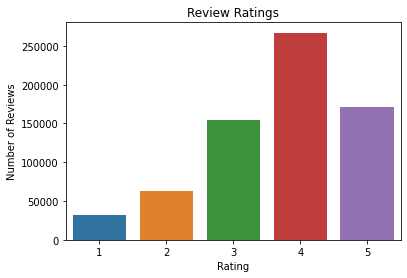

In [6]:
# plot ratings
sns.countplot(reviews_df.rating)
plt.title("Review Ratings")
plt.ylabel("Number of Reviews")
plt.xlabel('Rating');

The dataset is hugely imbalanced. This can be remedied by taking equal-sized samples for our sentiment analysis models.

In [7]:
# take length of review
reviews_df["review_length"] = reviews_df['reviewContent'].map(len)

In [8]:
# tag sentiment
def to_sentiment(rating):
  rating = int(rating)
  if rating <= 3:
    return 'negative'
  else:
    return 'positive'

reviews_df['sentiment'] = reviews_df.rating.apply(to_sentiment)

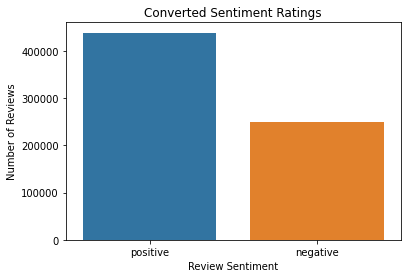

In [9]:
ax = sns.countplot(reviews_df.sentiment)
plt.title("Converted Sentiment Ratings")
plt.ylabel("Number of Reviews")
plt.xlabel('Review Sentiment');

In [10]:
### Get smaller sample of the data to speed up computation
## get 500 reviews each with positive and negative sentiments
small_df_pos = reviews_df[reviews_df['sentiment']=="positive"].sample(n=500, random_state=1)
small_df_neg = reviews_df[reviews_df['sentiment']=="negative"].sample(n=500, random_state=1)
small_df = pd.concat([small_df_pos, small_df_neg], ignore_index=True)

In [11]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [12]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):

    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [13]:
# expand contractions
small_df["text_clean"] = small_df["reviewContent"].apply(expand_contractions)

In [14]:
# Clean text (convert non-letters and double spaces to single space)
small_df["text_clean"] = small_df["text_clean"].str.replace('[^a-z ]|  ', ' ', regex=True, case=False)

In [15]:
### Create X (features) and Y (target)
sentiment_label = small_df[["sentiment"]]
sentiment_features = small_df[["reviewContent"]]
sentiment_features_clean = small_df[["text_clean"]]

# TextBlob (lexicon-based)

In [16]:
polarity_score_tb = [TextBlob(text).sentiment.polarity for text in sentiment_features.reviewContent]

In [17]:
polarity_score_tb_clean = [TextBlob(text).sentiment.polarity for text in sentiment_features_clean.text_clean]

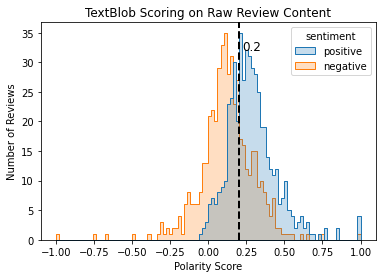

In [44]:
fig, ax = plt.subplots()
sns.histplot(x=polarity_score_tb,
            hue=sentiment_label.sentiment,
            multiple="layer",
            element="step",
            bins=100)
plt.title("TextBlob Scoring on Raw Review Content")
ax.axvline(.2,linewidth=2,linestyle="--",color='black')
ax.text(.22, 32,"0.2",color='black',size=12)
plt.ylabel("Number of Reviews")
plt.xlabel("Polarity Score");
# https://seaborn.pydata.org/generated/seaborn.histplot.html

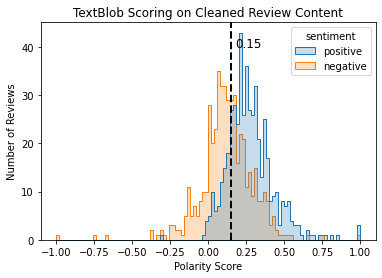

In [48]:
sns.histplot(x=polarity_score_tb_clean,
            hue=sentiment_label.sentiment,
            multiple="layer",
            element="step",
            bins=100)
plt.title("TextBlob Scoring on Cleaned Review Content")
plt.axvline(.15,linewidth=2,linestyle="--",color='black')
plt.text(.18, 40,"0.15",color='black',size=12)
plt.ylabel("Number of Reviews")
plt.xlabel("Polarity Score");
# https://seaborn.pydata.org/generated/seaborn.histplot.html

In [20]:
predicted_sentiments = ['positive' if score >= 0.2 
                        else 'negative' for score in polarity_score_tb]

In [21]:
predicted_sentiments_clean = ['positive' if score >= 0.15 
                        else 'negative' for score in polarity_score_tb_clean]

In [22]:
results_textblob = pd.DataFrame([polarity_score_tb,polarity_score_tb_clean,
           predicted_sentiments,predicted_sentiments_clean]).T
results_textblob.columns = ['score_raw','score_clean',
           'label_raw','label_clean']

In [23]:
results_textblob

,score_raw,score_clean,label_raw,label_clean
0,0.348153,0.348153,positive,positive
1,0.120652,0.113043,negative,negative
2,0.595,0.595,positive,positive
3,0.160119,0.152976,negative,positive
4,0.137459,0.124528,negative,negative
...,...,...,...,...
995,0.1003,0.130338,negative,negative
996,-0.0625,-0.05,negative,negative
997,0.159694,0.159694,negative,positive
998,0.072379,0.069451,negative,negative


# Transformers (Transfer Learning)

In [24]:
# instantiate pipeline
cls = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)
All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


The BERT implementation cannot handle text with more than 512 tokens. Thus, we set truncation to True and take only the first 512 tokens, cutting off extremely long reviews. This should not have a significant effect on our results.

In [25]:
transf_label_raw = cls(list(sentiment_features.reviewContent),truncation=True)

In [52]:
transf_label_raw = pd.DataFrame.from_records(transf_label_raw)

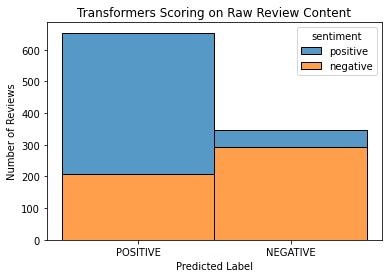

In [57]:
sns.histplot(x=transf_label_raw.label,
            hue=sentiment_label.sentiment,
            multiple="stack")
plt.title("Transformers Scoring on Raw Review Content")
plt.ylabel("Number of Reviews")
plt.xlabel("Predicted Label");
# https://seaborn.pydata.org/generated/seaborn.histplot.html

In [26]:
transf_label_clean = cls(list(sentiment_features_clean.text_clean),truncation=True)

In [58]:
transf_label_clean = pd.DataFrame.from_records(transf_label_clean)

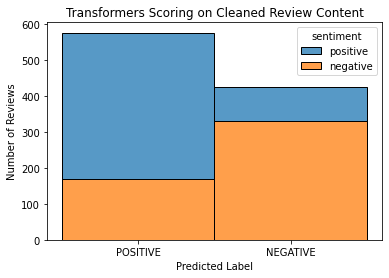

In [59]:
sns.histplot(x=transf_label_clean.label,
            hue=sentiment_label.sentiment,
            multiple="stack")
plt.title("Transformers Scoring on Cleaned Review Content")
plt.ylabel("Number of Reviews")
plt.xlabel("Predicted Label");
# https://seaborn.pydata.org/generated/seaborn.histplot.html

In [108]:
results_transformers = pd.concat([transf_label_raw,transf_label_clean],axis=1)
results_transformers.columns = ['tf_label_raw','tf_conf_raw',
           'tf_label_clean','tf_conf_clean']

In [95]:
results_transformers

,tf_label_raw,tf_conf_raw,tf_label_clean,tf_conf_clean
0,POSITIVE,0.999790,POSITIVE,0.999740
1,POSITIVE,0.999229,POSITIVE,0.998164
2,POSITIVE,0.997314,NEGATIVE,0.954587
3,NEGATIVE,0.954427,NEGATIVE,0.982705
4,POSITIVE,0.989587,POSITIVE,0.989647
...,...,...,...,...
995,NEGATIVE,0.629143,POSITIVE,0.907640
996,NEGATIVE,0.992209,NEGATIVE,0.992441
997,POSITIVE,0.874674,NEGATIVE,0.856546
998,NEGATIVE,0.987804,NEGATIVE,0.997394


# Model evaluation

In [148]:
# Combine results in one dataframe
results = pd.concat([small_df,results_textblob,results_transformers],axis=1)

In [149]:
## Confusion Matrices
cm_tb_raw = confusion_matrix(results.label_raw, results.sentiment)
cm_tb_clean = confusion_matrix(results.label_clean, results.sentiment)
cm_tf_raw = confusion_matrix(results.tf_label_raw.str.lower(), results.sentiment)
cm_tf_clean = confusion_matrix(results.tf_label_clean.str.lower(), results.sentiment)

In [150]:
cf_models=['TextBlob on Raw Data',
            'TextBlob on Cleaned Data',
            'Transformer on Raw Data',
            'Transformer on Cleaned Data']
cf_predictions = ['True Negative',
                 'False Negative',
                 'False Positive',
                 'True Positive']
cm_df = pd.DataFrame(index=cf_models,columns=cf_predictions)

In [151]:
cf_matrices = [cm_tb_raw,cm_tb_clean,cm_tf_raw,cm_tf_clean]

row_count=-1
col_count=0
for i in cf_matrices:
    row_count += 1
    col_count=0
    for row in i:
        for col in row:
            cm_df.iloc[row_count,col_count]=col
            col_count += 1
    
cm_df

,True Negative,False Negative,False Positive,True Positive
TextBlob on Raw Data,358,149,142,351
TextBlob on Cleaned Data,293,88,207,412
Transformer on Raw Data,292,54,208,446
Transformer on Cleaned Data,330,95,170,405


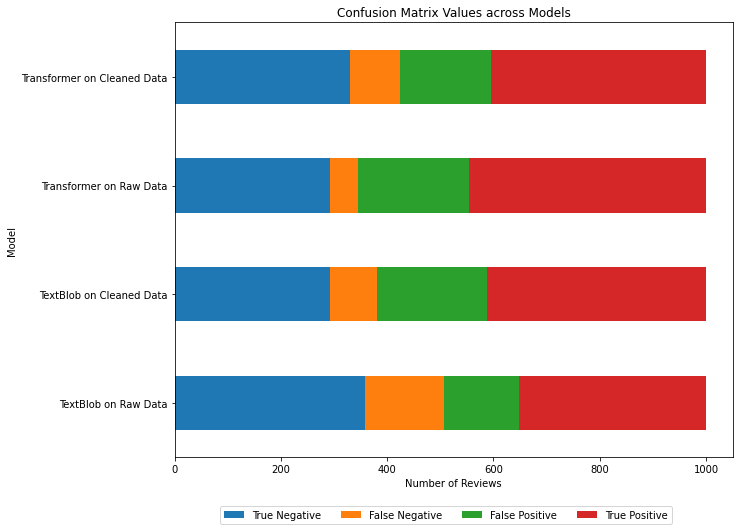

In [182]:
cm_df.plot.barh(stacked=True,figsize=(10,8))
plt.xlabel('Number of Reviews')
plt.ylabel('Model')
plt.title('Confusion Matrix Values across Models')
plt.legend(bbox_to_anchor=(.9, -.1), ncol=4)
plt.xticks(rotation=0);

We want to capture as much of the negative reviews as possible. TextBlob on Raw Data has the highest number of true negatives and the least false positives. However, this comes at the expense of more false negatives.

In [280]:
from sklearn import metrics

def get_metrics(true_labels, predicted_labels,model_name):

    df = pd.DataFrame({'Accuracy': [metrics.accuracy_score(true_labels,
                                               predicted_labels)],
            'Precision': [metrics.precision_score(true_labels,
                                               predicted_labels,
                                               average='weighted')],
             'Recall':[metrics.recall_score(true_labels,
                                               predicted_labels,
                                               average='weighted')],
             'F1 Score':[metrics.f1_score(true_labels,
                                               predicted_labels,
                                               average='weighted')]}).T
    df.columns=[model_name]
    return(df)

In [290]:
pd.concat([get_metrics(results.sentiment,results.label_raw,'TextBlob on Raw Data'),
          get_metrics(results.sentiment,results.label_clean,'TextBlob on Cleaned Data'),
          get_metrics(results.sentiment,results.tf_label_raw.str.lower(),'Transformer on Raw Data'),
          get_metrics(results.sentiment,results.tf_label_clean.str.lower(),'Transformer on Cleaned Data')],
         axis=1).round(2)

,TextBlob on Raw Data,TextBlob on Cleaned Data,Transformer on Raw Data,Transformer on Cleaned Data
Accuracy,0.71,0.70,0.74,0.74
Precision,0.71,0.72,0.76,0.74
Recall,0.71,0.70,0.74,0.74
F1 Score,0.71,0.70,0.73,0.73


We get evaluation metric scores higher than 70% across the board. Since we used unsupervised learning models, i.e.: did not train on the Yelp review data, these scores may indicate good performance.

In [209]:
# NLTK
from nltk.corpus import stopwords
sw_nltk = stopwords.words("english")
# Spacy
from spacy.lang.en.stop_words import STOP_WORDS as sw_spacy
# sklearn
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as sw_sklearn
# gensim
from gensim.parsing.preprocessing import STOPWORDS as sw_gensim

# combine all stopword lists
stop_words = set.union(set(sw_sklearn),sw_nltk,sw_spacy,set(sw_gensim),sw_addl)

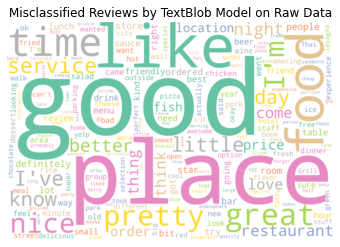

In [291]:
mislabeled_tb_raw = results.loc[results.sentiment!=results.label_raw]['reviewContent']
# Join the different data together
long_string = ','.join(mislabeled_tb_raw)
# generate wordcloud eliminating stopwords
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap='Set2', 
                      collocations=False, stopwords = stop_words).generate(long_string)
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Misclassified Reviews by TextBlob Model on Raw Data")
plt.show()

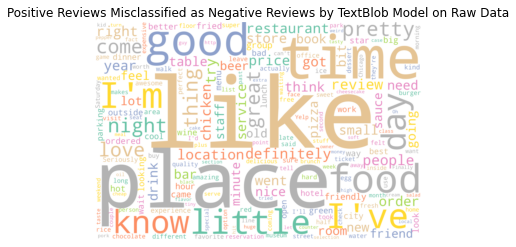

In [210]:
pos_mislabeled_tb_raw = results.loc[(results.sentiment=="positive") & (results.label_raw=="negative")]['reviewContent']
# Join the different data together
long_string = ','.join(pos_mislabeled_tb_raw)
# generate wordcloud eliminating stopwords
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap='Set2', 
                      collocations=False, stopwords = stop_words).generate(long_string)
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews Misclassified as Negative Reviews by TextBlob Model on Raw Data")
plt.show()

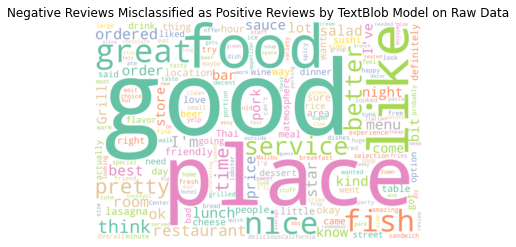

In [212]:
neg_mislabeled_tb_raw = results.loc[(results.sentiment=="negative") & (results.label_raw=="positive")]['reviewContent']
# Join the different data together
long_string = ','.join(neg_mislabeled_tb_raw)
# generate wordcloud eliminating stopwords
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap='Set2', 
                      collocations=False, stopwords = stop_words).generate(long_string)
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Reviews Misclassified as Positive Reviews by TextBlob Model on Raw Data")
plt.show()

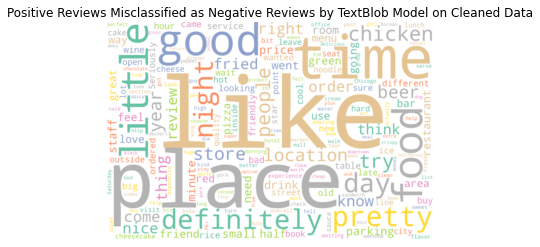

In [213]:
pos_mislabeled = results.loc[(results.sentiment=="positive") & (results.label_clean=="negative")]['text_clean']
# Join the different data together
long_string = ','.join(pos_mislabeled)
# generate wordcloud eliminating stopwords
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap='Set2', 
                      collocations=False, stopwords = stop_words).generate(long_string)
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews Misclassified as Negative Reviews by TextBlob Model on Cleaned Data")
plt.show()

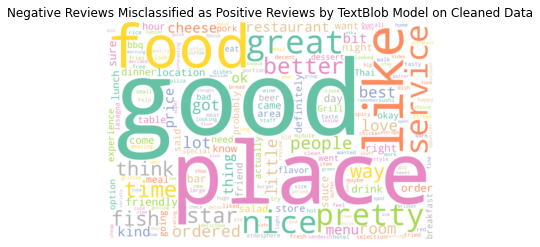

In [214]:
neg_mislabeled = results.loc[(results.sentiment=="negative") & (results.label_clean=="positive")]['text_clean']
# Join the different data together
long_string = ','.join(neg_mislabeled)
# generate wordcloud eliminating stopwords
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap='Set2', 
                      collocations=False, stopwords = stop_words).generate(long_string)
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Reviews Misclassified as Positive Reviews by TextBlob Model on Cleaned Data")
plt.show()

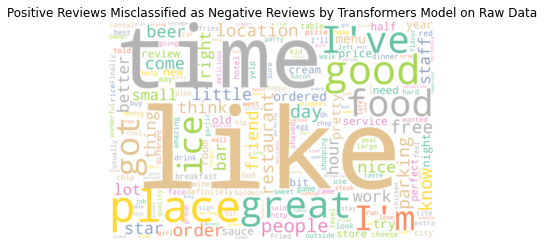

In [219]:
pos_mislabeled = results.loc[(results.sentiment=="positive") & (results.tf_label_raw=="NEGATIVE")]['reviewContent']
# Join the different data together
long_string = ','.join(pos_mislabeled)
# generate wordcloud eliminating stopwords
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap='Set2', 
                      collocations=False, stopwords = stop_words).generate(long_string)
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews Misclassified as Negative Reviews by Transformers Model on Raw Data")
plt.show()

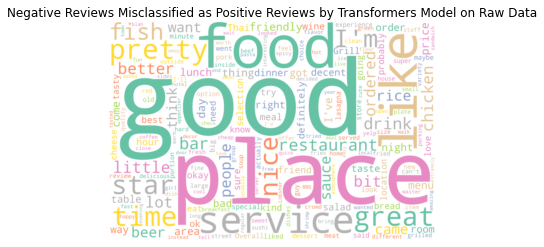

In [220]:
neg_mislabeled = results.loc[(results.sentiment=="negative") & (results.tf_label_raw=="POSITIVE")]['reviewContent']
# Join the different data together
long_string = ','.join(neg_mislabeled)
# generate wordcloud eliminating stopwords
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap='Set2', 
                      collocations=False, stopwords = stop_words).generate(long_string)
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Reviews Misclassified as Positive Reviews by Transformers Model on Raw Data")
plt.show()

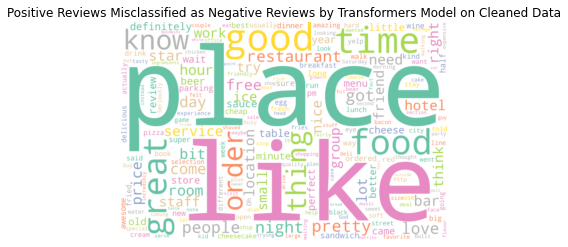

In [216]:
pos_mislabeled = results.loc[(results.sentiment=="positive") & (results.tf_label_clean=="NEGATIVE")]['text_clean']
# Join the different data together
long_string = ','.join(pos_mislabeled)
# generate wordcloud eliminating stopwords
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap='Set2', 
                      collocations=False, stopwords = stop_words).generate(long_string)
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Positive Reviews Misclassified as Negative Reviews by Transformers Model on Cleaned Data")
plt.show()

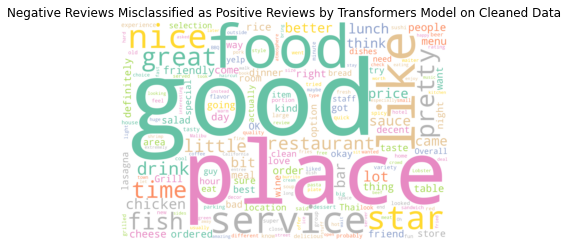

In [218]:
neg_mislabeled = results.loc[(results.sentiment=="negative") & (results.tf_label_clean=="POSITIVE")]['text_clean']
# Join the different data together
long_string = ','.join(neg_mislabeled)
# generate wordcloud eliminating stopwords
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap='Set2', 
                      collocations=False, stopwords = stop_words).generate(long_string)
# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Negative Reviews Misclassified as Positive Reviews by Transformers Model on Cleaned Data")
plt.show()